In [1]:
import mplfinance as mpf
import pandas as pd
from dataloader import get_candle_data
import numpy as np

In [2]:
symbol = 'JINDALSAW'
portfolio = pd.read_csv('../data/portfolio.csv')
#print(portfolio.head())
#print(portfolio[portfolio['SYMBOL'] == symbol])
instrument = portfolio.loc[portfolio['SYMBOL'] == symbol, 'INSTRUMENT_KEY']
instrument = instrument.replace('|', '%7C')
instrument = instrument.reset_index()
instrument

,index,INSTRUMENT_KEY
0,2,NSE_EQ|INE324A01032


In [3]:
instrument.loc[0, 'INSTRUMENT_KEY']

'NSE_EQ|INE324A01032'

In [4]:
to_date = '2025-07-05'
from_date = '2015-01-01'
frequency = '1'
interval = 'months'

In [5]:
candle_data = get_candle_data(str(instrument.loc[0, 'INSTRUMENT_KEY']), interval, to_date, from_date, frequency)

https://api.upstox.com/v3/historical-candle/NSE_EQ|INE324A01032/months/1/2025-07-05/2015-01-01
{'status': 'success', 'data': {'candles': [['2025-07-01T00:00:00+05:30', 241.1, 244.91, 231.52, 232.89, 7974854, 0], ['2025-06-01T00:00:00+05:30', 211.3, 260.4, 210.0, 240.78, 117913464, 0], ['2025-05-01T00:00:00+05:30', 249.3, 254.24, 199.62, 211.9, 42651216, 0], ['2025-04-01T00:00:00+05:30', 271.0, 277.95, 225.1, 248.0, 19860945, 0], ['2025-03-01T00:00:00+05:30', 246.66, 286.4, 230.41, 270.09, 32904998, 0], ['2025-02-01T00:00:00+05:30', 249.05, 269.45, 224.6, 246.45, 31129164, 0], ['2025-01-01T00:00:00+05:30', 289.3, 289.3, 217.65, 250.05, 32079165, 0], ['2024-12-01T00:00:00+05:30', 308.6, 342.8, 287.7, 291.4, 26109315, 0], ['2024-11-01T00:00:00+05:30', 328.0, 337.8, 287.5, 308.05, 19845004, 0], ['2024-10-01T00:00:00+05:30', 372.2, 383.85, 293.55, 316.5, 41662096, 0], ['2024-09-01T00:00:00+05:30', 342.5, 379.95, 331.8, 371.65, 41513774, 0], ['2024-08-01T00:00:00+05:30', 321.7, 355.0, 298.75

In [6]:
candle_data

,date,open,high,low,close,vol,misc
date,,,,,,,
2025-07-01 00:00:00+05:30,2025-07-01T00:00:00+05:30,241.10,244.91,231.52,232.89,7974854,0
2025-06-01 00:00:00+05:30,2025-06-01T00:00:00+05:30,211.30,260.40,210.00,240.78,117913464,0
2025-05-01 00:00:00+05:30,2025-05-01T00:00:00+05:30,249.30,254.24,199.62,211.90,42651216,0
2025-04-01 00:00:00+05:30,2025-04-01T00:00:00+05:30,271.00,277.95,225.10,248.00,19860945,0
2025-03-01 00:00:00+05:30,2025-03-01T00:00:00+05:30,246.66,286.40,230.41,270.09,32904998,0
...,...,...,...,...,...,...,...
2015-05-01 00:00:00+05:30,2015-05-01T00:00:00+05:30,34.60,37.30,29.90,30.70,28359054,0
2015-04-01 00:00:00+05:30,2015-04-01T00:00:00+05:30,32.90,36.30,30.50,34.45,29093836,0
2015-03-01 00:00:00+05:30,2015-03-01T00:00:00+05:30,39.50,40.10,28.10,32.90,37866534,0


In [7]:
candle_data.sort_index(ascending=True, inplace=True)

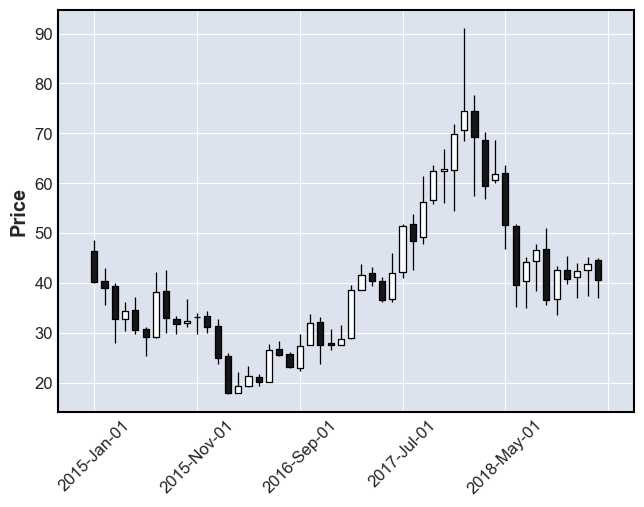

In [8]:
mpf.plot(candle_data[:50], type='candle')

In [9]:
candle_data['returns'] = candle_data['close']/candle_data['close'].shift(1) -1
candle_data['l_returns'] = np.log(candle_data['close']/candle_data['close'].shift(1))
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2015-01-01 00:00:00+05:30,2015-01-01T00:00:00+05:30,46.5,48.6,40.1,40.30,64719650,0,NaN,NaN
2015-02-01 00:00:00+05:30,2015-02-01T00:00:00+05:30,40.4,43.1,35.7,39.00,49201222,0,-0.032258,-0.032790
2015-03-01 00:00:00+05:30,2015-03-01T00:00:00+05:30,39.5,40.1,28.1,32.90,37866534,0,-0.156410,-0.170089
2015-04-01 00:00:00+05:30,2015-04-01T00:00:00+05:30,32.9,36.3,30.5,34.45,29093836,0,0.047112,0.046036
2015-05-01 00:00:00+05:30,2015-05-01T00:00:00+05:30,34.6,37.3,29.9,30.70,28359054,0,-0.108853,-0.115246


In [10]:
candle_data.dropna(inplace=True)
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2015-02-01 00:00:00+05:30,2015-02-01T00:00:00+05:30,40.4,43.1,35.7,39.00,49201222,0,-0.032258,-0.032790
2015-03-01 00:00:00+05:30,2015-03-01T00:00:00+05:30,39.5,40.1,28.1,32.90,37866534,0,-0.156410,-0.170089
2015-04-01 00:00:00+05:30,2015-04-01T00:00:00+05:30,32.9,36.3,30.5,34.45,29093836,0,0.047112,0.046036
2015-05-01 00:00:00+05:30,2015-05-01T00:00:00+05:30,34.6,37.3,29.9,30.70,28359054,0,-0.108853,-0.115246
2015-06-01 00:00:00+05:30,2015-06-01T00:00:00+05:30,30.8,31.3,25.5,29.30,35697910,0,-0.045603,-0.046675


In [11]:
candle_data.to_csv(f'../data/symbols/{symbol}.csv')